In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
data=pd.read_csv('assign2.csv')
data

,Name,distance,diameter,density,class
0,Mercury,0.387,4878,5.420,black
1,Venus,0.723,12104,5.250,black
2,Earth,1.000,12756,5.520,black
3,Mars,1.524,6787,3.940,black
4,Jupiter,5.203,142800,1.314,blue
5,Saturn,9.539,120660,0.690,blue
6,Uranus,19.180,51118,1.290,blue
7,Neptune,30.060,49528,1.640,blue
8,Pluto,39.530,2300,2.030,blue


### Data Normalization

In [142]:
distance_m=np.mean(data['distance'])
diameter_m=np.mean(data['diameter'])
density_m=np.mean(data['density'])

#### Center to zero

In [143]:
data['distance']-=distance_m
data['diameter']-=diameter_m
data['density']-=density_m

#### Set variance to unit variance
variance is the square root of the sum of square divided by (n-1)

In [144]:
distance_var=np.sqrt(np.sum(np.square(data['distance']))/8)
diameter_var=np.sqrt(np.sum(np.square(data['diameter']))/8)
density_var=np.sqrt(np.sum(np.square(data['density']))/8)

In [145]:
data['distance']/=distance_var
data['diameter']/=diameter_var
data['density']/=density_var
data

,Name,distance,diameter,density,class
0,Mercury,-0.794690,-0.754533,1.203928,black
1,Venus,-0.771508,-0.617858,1.118988,black
2,Earth,-0.752396,-0.605526,1.253892,black
3,Mars,-0.716243,-0.718425,0.464450,black
4,Jupiter,-0.462411,1.854170,-0.847624,blue
5,Saturn,-0.163249,1.435407,-1.159403,blue
6,Uranus,0.501930,0.120066,-0.859615,blue
7,Neptune,1.252594,0.089992,-0.684739,blue
8,Pluto,1.905975,-0.803294,-0.489876,blue


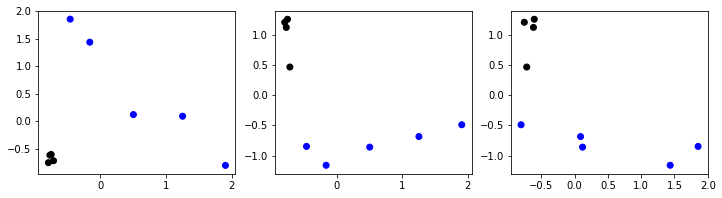

In [187]:
x=data['distance']
y=data['diameter']
z=data['density']
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,3))
ax1.scatter(x,y,c=data['class'])
ax2.scatter(x,z,c=data['class'])
ax3.scatter(y,z,c=data['class'])

In [119]:
three_dim=np.vstack([data['distance'],data['diameter'],data['density']])

In [201]:
covariance=np.dot(three_dim,three_dim.T)

In [202]:
eig_values,eig_vectors=np.linalg.eig(covariance)

In [203]:
eig_values

array([ 0.3869077 ,  8.39648773, 15.21660458])

In [204]:
K1=eig_values[-1]/np.sum(eig_values)
print(K1)

0.6340251907676628


In [205]:
K2=(eig_values[2]+eig_values[1])/np.sum(eig_values)
print(K2)

0.9838788460106381


In [206]:
print(eig_vectors)
b=eig_vectors[:,1:3]

[[ 0.46307095  0.76932901 -0.44011155]
 [ 0.54679005 -0.63877445 -0.54128352]
 [ 0.69755712 -0.01000406  0.71645933]]


In [207]:
b.T

array([[ 0.76932901, -0.63877445, -0.01000406],
       [-0.44011155, -0.54128352,  0.71645933]])

In [208]:
aft_trans=np.dot(b.T,three_dim)
print(aft_trans)

[[-0.14144613 -0.21006609 -0.20459006 -0.09676123 -1.53166316 -1.03089502
   0.31805362  0.91302199  1.98434606]
 [ 1.62073363  1.47569486  1.5572622   1.03685801 -1.40740719 -1.5357795
  -0.90177419 -1.09057967 -0.75500815]]


In [209]:
data['pca_2']=aft_trans[0]

In [210]:
data['pca_1']=aft_trans[1]

In [211]:
data

,Name,distance,diameter,density,class,pca_2,pca_1
0,Mercury,-0.794690,-0.754533,1.203928,black,-0.141446,1.620734
1,Venus,-0.771508,-0.617858,1.118988,black,-0.210066,1.475695
2,Earth,-0.752396,-0.605526,1.253892,black,-0.204590,1.557262
3,Mars,-0.716243,-0.718425,0.464450,black,-0.096761,1.036858
4,Jupiter,-0.462411,1.854170,-0.847624,blue,-1.531663,-1.407407
5,Saturn,-0.163249,1.435407,-1.159403,blue,-1.030895,-1.535780
6,Uranus,0.501930,0.120066,-0.859615,blue,0.318054,-0.901774
7,Neptune,1.252594,0.089992,-0.684739,blue,0.913022,-1.090580
8,Pluto,1.905975,-0.803294,-0.489876,blue,1.984346,-0.755008


In [212]:
trans_2d=np.vstack([data['pca_1'],data['pca_2']])

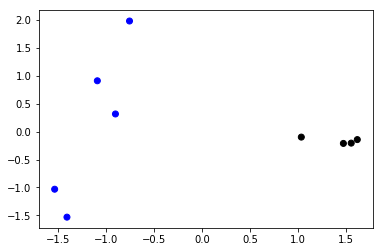

In [213]:
plt.scatter(data['pca_1'],data['pca_2'],c=data['class'])